In [1]:
import pandas as pd
df=pd.read_csv("D:/Datasets/house-prices-advanced-regression-techniques/train.csv")
print(df.shape)

(1460, 81)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [7]:
df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (1460, 81)


In [9]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [11]:
numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == "object":
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)
print("Numeric columns:")
print(numeric_cols)
print("\nCategorical columns:")
print(categorical_cols)

Numeric columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQ

In [13]:
# import numpy as np
# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_limit = Q1 - 1.5 * IQR
#     upper_limit = Q3 + 1.5 * IQR
#     df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
#     print(df.shape)
#     # break
# print("After removing outliers:")
# print(df.shape)

In [15]:
for col in df.columns:  
    if df[col].dtype != "object":
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mean())
    else:
        if df[col].isnull().sum() > 0:
           df[col] = df[col].fillna(df[col].mode()[0])
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])
    print(df)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60         3         65.0     8450   Pave  Grvl      Reg   
1        2          20         3         80.0     9600   Pave  Grvl      Reg   
2        3          60         3         68.0    11250   Pave  Grvl      IR1   
3        4          70         3         60.0     9550   Pave  Grvl      IR1   
4        5          60         3         84.0    14260   Pave  Grvl      IR1   
...    ...         ...       ...          ...      ...    ...   ...      ...   
1455  1456          60         3         62.0     7917   Pave  Grvl      Reg   
1456  1457          20         3         85.0    13175   Pave  Grvl      Reg   
1457  1458          70         3         66.0     9042   Pave  Grvl      Reg   
1458  1459          20         3         68.0     9717   Pave  Grvl      Reg   
1459  1460          20         3         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolAre

In [21]:
y = df["SalePrice"]
X = df.drop("SalePrice", axis=1)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1460, 80)
y shape: (1460,)


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
corr=df.corr()
target=corr['SalePrice']
features=target[abs(target)>0.6]
print(features)

OverallQual    0.790982
ExterQual     -0.636884
BsmtQual      -0.618025
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64


In [27]:
x=df
x=x.drop('SalePrice',axis=1)
y=df['SalePrice']
print(x.shape)
print(y.shape)

(1460, 80)
(1460,)


In [29]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (1168, 80)
Test Shape: (292, 80)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)**0.5)

21585.481490979175
35327.849644667775


In [35]:
# y_train.describe()
y_train_pr=model.predict(X_train)
y_train_pr

array([134150.25856142, 186221.18656842, 104378.81640143, ...,
       117267.95200192, 166709.25404385, 203544.51232237])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [41]:
from sklearn.linear_model import Ridge,Lasso
r_model=Ridge()
r_model.fit(X_train,y_train)

Ridge()

In [43]:
l_model=Lasso()
l_model.fit(X_train,y_train)

C:\Users\jyots\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.643e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [45]:
ypred_r=r_model.predict(X_test)
ypred_l=l_model.predict(X_test)
print(mean_squared_error(y_test,ypred_r)**0.5)
print(mean_squared_error(y_test,ypred_l)**0.5)

35316.76580830609
35325.84185839941


In [47]:
len(y_train)
len(y_train_pr)

1168

In [49]:
y_train_pr.shape

(1168,)

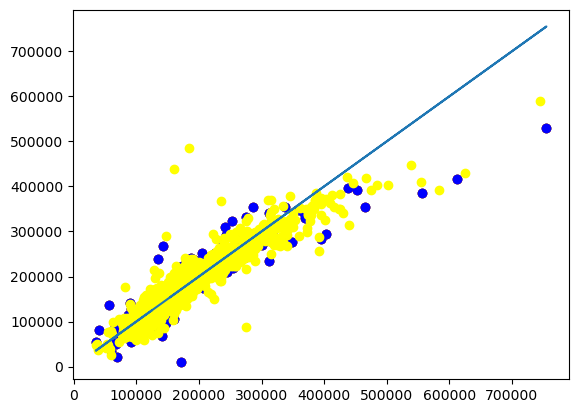

In [51]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_test)
plt.scatter(y_test,y_pred,label="Linear",color='green')
plt.scatter(y_test,ypred_l,label="Lasso",color='red')
plt.scatter(y_test,ypred_r,label="Ridge",color='blue')
plt.scatter(y_train,y_train_pr,label="Train",color='yellow')
plt.show()

In [52]:
y_train.describe()
y_train_pr=model.predict(X_train)
y_train_pr

C:\Users\jyots\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1111155.15776633, 1162237.86554042, 1113795.96657991, ...,
       1133307.55381402, 1150967.04900565, 1184899.06167088])

In [55]:
print(X_train.shape)

(1168, 80)


MAE: 27514.81506849315
RMSE: 42326.977519201144
R2: 0.7664280530556513


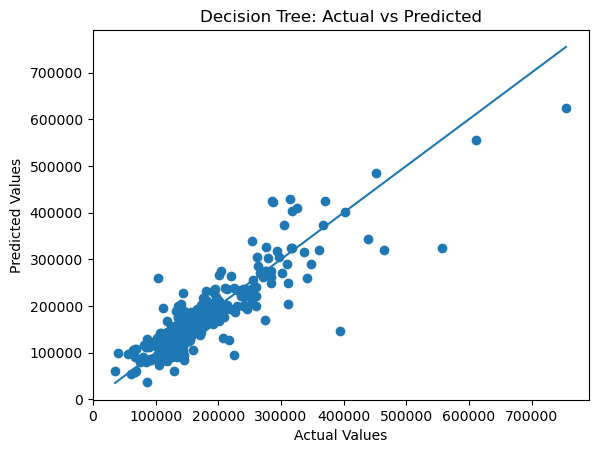

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df=pd.read_csv("D:/Datasets/house-prices-advanced-regression-techniques/train.csv")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols[:-1]]
y = df[numeric_cols[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()